# Notes on Quantum Mechanics
# By Brendan Lucas

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp, trapezoid
from scipy.constants import hbar
from scipy.linalg import expm, logm
from matplotlib import pyplot as plt

# The Schrodinger Equation

The time-dependent schrodinger equation

$$i \hbar \frac{d}{dt} |\psi\rangle = H|\psi\rangle $$

can be rearranged

$$\frac{d}{dt} |\psi\rangle = -\frac{i}{\hbar}H|\psi\rangle, $$

where $-\frac{i}{\hbar}H$ is an anti-Hermitian operator matrix, meaning $\left(-\frac{i}{\hbar}H\right)^{\dagger} = +\frac{i}{\hbar}H$ (opposite sign). $H$ must be Hermitian, because the eigenvalues must be real to be physically interpreted as energy. A differential equation of this form is solved with an initial condition

$$|\psi(t)\rangle = e^{-\frac{i}{\hbar}Ht}|\psi(0)\rangle = U(0, t)|\psi(0)\rangle,$$

where that is the matrix exponent.

$U(0, t) = e^{-\frac{i}{\hbar}Ht}$ is a time-evolution operator which acts on $|\psi(0)\rangle$ to produce $|\psi(t)\rangle$. $U$ is unitary because $H$ is Hermitian:

$$U^{\dagger} = \left( e^{-iHt/\hbar}\right)^{\dagger} =  e^{+iH^\dagger t/\hbar}=  e^{+iH t/\hbar}$$

Since the terms in the matrix exponentials of $U$ and $U^{\dagger}$ commute $[-\frac{i}{\hbar}H, +\frac{i}{\hbar}H] = 0$, the terms in the matrix exponentials may be combined into a sum when multiplied:

$$UU^{\dagger} = e^{-iHt/\hbar}e^{+iH t/\hbar} = e^{iH t/\hbar - iHt/\hbar} = I$$

So the time-evolution operator $U(0, t)$ is unitary when $H$ is Hermitian.

This form $|\psi(t)\rangle = U(0, t) |\psi(0)\rangle$ only works if $H$ does not change over time, or $t-0 = dt$ is infinitesimally small.





# Notes on Nielsen and Chuang Chapter 2

## Exercise 2.1


## Show that (1, -1), (1, 2), and (2, 1) are linearly dependent.

Are there coefficients $a_1$, $a_2$, and $a_3$ for which $a_1 v_1 + a_2 v_2 + a_3 v_3 = 0$?

$a_1 \begin{bmatrix} 1 \\ -1 \end{bmatrix} + a_2 \begin{bmatrix} 1 \\ 2 \end{bmatrix} + a_3 \begin{bmatrix} 2 \\ 1 \end{bmatrix} = 0$

If $a_3 = -1$, then the top element cancels

$a_1 \begin{bmatrix} 1 \\ -1 \end{bmatrix} + a_2 \begin{bmatrix} 1 \\ 2 \end{bmatrix}- \begin{bmatrix} 2 \\ 1 \end{bmatrix} = 0$

The other two vectors already add up to cancel the other elements.

$ \begin{bmatrix} 1 \\ -1 \end{bmatrix} + \begin{bmatrix} 1 \\ 2 \end{bmatrix}- \begin{bmatrix} 2 \\ 1 \end{bmatrix} = 0$

The combination of coefficients is $a_1 = 1$, $a_2=1$, and $a_3=-1$. The existence of this combination implies that $v_1$, $v_2$, and $v_3$ are linearly dependent.

## "The linear operator and matrix viewpoints turn out to be completely equivalent"

## Exercise 2.2

$V$ is a vector space with basis vectors $|0\rangle$ and $|1\rangle$, and $A$ is the bit flip operator $A|0\rangle = |1\rangle$ and $A|1\rangle = |0\rangle$. Find a matrix representation for $A$.

We can choose the basis $|1\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $|0\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$. Then, the matrix that flips the bit is

$A = \begin{bmatrix} 0, 1 \\ 1, 0 \end{bmatrix}$

because $\begin{bmatrix} 0, 1 \\ 1, 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix}$

and $\begin{bmatrix} 0, 1 \\ 1, 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0\end{bmatrix}$

For the different basis $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}$ and $\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix}$, the different matrix representation that does the bit flip is

$$A = \begin{bmatrix} 1, 0 \\ 0, -1 \end{bmatrix}$$

# Exercise 2.9

The Pauli operators are

$$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \begin{bmatrix} 1 & 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 1 \end{bmatrix} \begin{bmatrix} 0 & 1 \end{bmatrix} = |0\rangle\langle 0 | + |1\rangle\langle 1 |$$

$$\sigma_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle 0 | - |1\rangle\langle 1 | $$

$$\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle 1 | + |1\rangle\langle 0 |$$

$$\sigma_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = i|1\rangle\langle 0 | - i|0\rangle\langle 1 |$$

# Exercise 2.11

Find the eigenvectors, eigenvalues, and diagonal representations of the Pauli matrices

In [ ]:
X = np.array([[0, 1],
              [1, 0]])
Y = np.array([[0, -1j],
              [1j, 0]])
Z = np.array([[1, 0],
              [0, -1]])

In [ ]:
X_eigenvalues, X_eigenvectors = np.linalg.eig(X)

print('X eigenvalues: ', X_eigenvalues)
print('X eigenvector for λ=1: ', X_eigenvectors[:, 0])
print('X eigenvector for λ=-1: ', X_eigenvectors[:, 1])

P = X_eigenvectors
P_inv = np.linalg.inv(P)
D = np.diag(X_eigenvalues)

#The following is the diagonal representation of X
X_diagonalization = np.round(P @ D @ P_inv)
print('PDP^{-1} = ', X_diagonalization)

X eigenvalues:  [ 1. -1.]
X eigenvector for λ=1:  [0.70710678 0.70710678]
X eigenvector for λ=-1:  [-0.70710678  0.70710678]
PDP^{-1} =  [[0. 1.]
 [1. 0.]]


In [ ]:
Y_eigenvalues, Y_eigenvectors = np.linalg.eig(Y)

print('Y eigenvalues: ', Y_eigenvalues)
print('Y eigenvector for λ=1: ', Y_eigenvectors[:, 0])
print('Y eigenvector for λ=-1: ', Y_eigenvectors[:, 1])

P = Y_eigenvectors
P_inv = np.linalg.inv(P)
D = np.diag(Y_eigenvalues)

#The following is the diagonal representation of Y
Y_diagonalization = np.round(P @ D @ P_inv)
print('PDP^{-1} = ', Y_diagonalization)

Y eigenvalues:  [ 1.+0.j -1.+0.j]
Y eigenvector for λ=1:  [-0.        -0.70710678j  0.70710678+0.j        ]
Y eigenvector for λ=-1:  [0.70710678+0.j         0.        -0.70710678j]
PDP^{-1} =  [[-0.+0.j  0.-1.j]
 [ 0.+1.j  0.+0.j]]


In [ ]:
Z_eigenvalues, Z_eigenvectors = np.linalg.eig(Z)

print('Z eigenvalues: ', Z_eigenvalues)
print('Z eigenvector for λ=1: ', Z_eigenvectors[:, 0])
print('Z eigenvector for λ=-1: ', Z_eigenvectors[:, 1])

P = Z_eigenvectors
P_inv = np.linalg.inv(P)
D = np.diag(Z_eigenvalues)

#The following is the diagonal representation of Z
Z_diagonalization = np.round(P @ D @ P_inv)
print('PDP^{-1} = ', Z_diagonalization)

Z eigenvalues:  [ 1. -1.]
Z eigenvector for λ=1:  [1. 0.]
Z eigenvector for λ=-1:  [0. 1.]
PDP^{-1} =  [[ 1.  0.]
 [ 0. -1.]]


In bra-ket notation, the diagonal representation of any Hermitian operator $A$ with eigenvalues $\lambda_i$ and eigenvectors $|v_i\rangle$ may be written

$$A = \sum_i \lambda_i |v_i\rangle\langle v_i|$$

**Matrices with fewer eigenvectors than eigenvalues cannot be diagonalized.**

## Exercise 2.18

Show that all eigenvalues of a unitary matrix have modulus 1, that is, can be written in the form $e^{i\theta}$ for some real $\theta$.

A unitary operator $U$ is normal and has a spectral decomposition.

Therefore $$UU^\dagger = \left(\sum_i \lambda_i |v_i\rangle \langle v_i |\right)\left(\sum_j \lambda_j^* |v_j\rangle \langle v_j | \right) $$

$$ = \sum_{i, j} \lambda_i \lambda_j^* |v_i\rangle \langle v_i |v_j\rangle \langle v_i | $$

$$ = \sum_{i, j} \lambda_i \lambda_j^* |v_i\rangle \delta_{i, j} \langle v_i | $$

$$ = \sum_{i} \lambda_i \lambda_i^* |v_i\rangle\langle v_i | $$

Which is equal to the identity, because $U$ is unitary:
$$ = \sum_{i} |\lambda_i|^2 |v_i\rangle\langle v_i | = I, $$

and we can then substitute the completeness relation
$$\sum_{i} |v_i\rangle\langle v_i | = I$$

so that $|\lambda_i|^2 = 1 \quad\forall\quad i$. In other words, the modulus of the eigenvalues of a unitary transformation is 1, and those eigenvalues are written in the form $e^{i\theta}$ with real $\theta$.

# Exercise 2.51-2.53 from Nielsen and Chuang

The Hadamard gate is $H = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}$.

$H$ is unitary:
$\left(\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}\right)^{\dagger}=\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}$

$H^2=I$:


# Exercise 2.4 from Schumacher and Westmoreland

For input amplitudes $\begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{pmatrix}$ of the Mach-Zehnder interferometer,

$$\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}\begin{pmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{pmatrix}= \begin{pmatrix}1 \\ 0 \end{pmatrix},$$

the output amplitudes obey conservation of probability with the Hadamard gate.

In [ ]:
Hadamard = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
print(np.round(Hadamard@Hadamard))

[[ 1. -0.]
 [-0.  1.]]


The eigenvalues and eigenvectors of the Hadamard gate are

In [ ]:
Hadamard_eigenvalues, Hadamard_eigenvectors = np.linalg.eig(Hadamard)

print('Hadamard eigenvalues: ', Hadamard_eigenvalues)
print('Hadamard eigenvector for λ=1', Hadamard_eigenvectors[:, 0])
print('Hadamard eigenvector for λ=-1', Hadamard_eigenvectors[:, 1])

Hadamard eigenvalues:  [ 1. -1.]
Hadamard eigenvector for λ=1 [0.92387953 0.38268343]
Hadamard eigenvector for λ=-1 [-0.38268343  0.92387953]


# Notes on Sakurai Chapter 1

# Simplest Simulation of the Stern Gerlach

In [ ]:

def stern_gerlach_spin():
    which = np.random.randint(0, 2)
    if which:
        return +hbar/2
    else:
        return -hbar/2
print(stern_gerlach_spin())


5.272859088230782e-35


# Proof the eigenvalues of a Hermitian operator A are real and the eigenkets corresponding to different eigenvalues are orthogonal (Theorem 1)

$A | a'\rangle = a' | a' \rangle$ has eigenvalue $a'$ and eigenket $|a'\rangle$ of the Hermitian operator $A$.

$\langle a''|A = a''^* \langle a'' |$ has $a''$ as an eigenvalue of $A$, and $\langle a'' |$ as the dual of an eigenket $|a''\rangle$.

We can consider $a'$ and $a''$ to be different eigenvalues, or the same eigenvalue.

Multiply by $\langle a '' |$ on the left,

$$\langle a''|A|a'\rangle = a'\langle a''|a'\rangle,$$

and by $|a'\rangle$ on the right,

$$\langle a''|A|a'\rangle = a''^* \langle a''|a'\rangle,$$

so

$$a''^* \langle a''|a'\rangle = a'\langle a''|a'\rangle \quad\therefore\quad (a'-a''^*)\langle a''|a'\rangle=0,$$

meaning, if they are the same $a'=a''$, that $a'=a'^*$. The eigenvalues of a Hermitian operator are therefore real.

However, if they are different $a'\neq a''$, then $\langle a''|a'\rangle=0$. This means that $|a''\rangle$ and $|a'\rangle$ are orthogonal if $a'$ and $a''$ are different, because the inner product between them is zero.

Therefore, the eigenvalues of Hermitian $A$ are real and the eigenkets corresponding to different eigenvalues are orthogonal. The eigenkets are typically normalized, to be orthonormal. That means $\langle a''|a'\rangle = \delta_{a''a'}$, meaning the inner product is zero if the eigenvalues $a'$ and $a''$ are different, and one if they are the same.

# Derivation of the completeness relation

An arbitrary ket $|\alpha\rangle$ can be expanded in terms of the eigenkets of $A$,

$$|\alpha\rangle = \sum_{a'} c_{a'} |a'\rangle$$

where, since the basis kets $|a'\rangle$ and $|a''\rangle$ are orthonormal, the expansion coefficients are $c_{a'} = \langle a' |\alpha \rangle$.

This allows us to write

$$|\alpha \rangle = \sum_{\alpha'} | a'\rangle \langle a'|\alpha\rangle$$,

which, by the properties of multiplication, is equivalent to

$$|\alpha \rangle = \left(\sum_{\alpha'} |a'\rangle \langle a'|\right) \cdot |\alpha\rangle,$$

showing **the completeness relation**, that $\sum_{\alpha'} |a'\rangle \langle a'|=I$ is the identity operator.

# Projection operator

Furthermore, the operator $|a'\rangle \langle a'|$, acting on $|\alpha\rangle$, gives the product $|a'\rangle \langle a'|\alpha\rangle = c_{a'}|a'\rangle $, selecting "the portion of the ket $|\alpha\rangle$ parallel to $|a'\rangle$". Therefore $|a'\rangle \langle a'|$ is a **projection operator.**

Just like in linear algebra, the projection operator is idempotent *if* the basis is orthonormal with $\langle a'|a'\rangle=1$:

$$|a'\rangle\langle a' | \cdot |a'\rangle\langle a' | = |a'\rangle\langle a'|a'\rangle\langle a' | = |a'\rangle\langle a' |$$

Question: How does the convention that the basis is orthonormal relate to this idempotency, and the Born rule?

# Equation 1.79 and 1.82

Given the ket relation $|\gamma\rangle = X |\alpha \rangle$, we can write $\langle a' | \gamma \rangle = \langle a'|X|\alpha \rangle$. Then, since the expansion of $|\gamma\rangle$ is $X|\alpha \rangle = \sum_{a'} |a'\rangle\langle a'|X|\alpha\rangle$, the expansion coefficients are $c_{a'}=\langle a'|X|\alpha\rangle$.

Plugging in the expansion $|\alpha\rangle = \sum_{\alpha''} | a''\rangle \langle a''|\alpha\rangle$, $c_{a'}=\sum_{\alpha''} \langle a'|X| a''\rangle \langle a''|\alpha\rangle$ is Equation 1.79.

Likewise, the expansion coefficients of $\langle \gamma |$ are the conjugate $c_{a'}^*=\langle \alpha|X|a'\rangle$. Plugging in the expansion $\langle \alpha | = \sum_{\alpha''} \langle a'' |\langle\alpha|a''\rangle,$ $c_{a'}^* = \sum_{a''}\langle\alpha|a''\rangle\langle a '' |X|a'\rangle$ is Equation 1.82.

# Observable matrix and projection operators

The observable matrix (operator) $A$ can be represented in the basis of its eigenkets $A|a'\rangle = a'|a'\rangle$. Multilpying by the identity on both sides,

$$A = I \cdot A \cdot I = \sum_{a''}\sum_{a'}|a''\rangle\langle a''|A|a'\rangle\langle a'|,$$

and the components $\langle a''|A|a'\rangle$ are zero when $a''$ and $a'$ are different ($|a''\rangle$ and $A|a'\rangle$ are orthogonal), so $A = \sum_{a'} a'|a'\rangle\langle a'|$. This is a sum of projection operators weighted by their corresponding eigenvalues.


**Dirac**: "A measurement always causes the system to jump into an eigenstate of the dynamical variable that is being measured." And the measurement outcome will be the corresponding eigenvalue.

# Eigenvalues and Expectation values

The expectation value of observable $A$ is denoted $\langle A \rangle$, and it is defined with respect to pure state $|\alpha\rangle$ as

$$\langle A \rangle = \langle \alpha | A|\alpha\rangle$$

The identity $I=\sum_{a'}|a'\rangle\langle a'|$ may be inserted twice, so that

$$\langle A \rangle = \sum_{a'}\sum_{a''} \langle\alpha|a''\rangle\langle a''|A|a'\rangle\langle a' | \alpha \rangle$$

Plugging in $A|a'\rangle = a' |a'\rangle$,

$$\langle A \rangle = \sum_{a'}\sum_{a''} \langle\alpha|a''\rangle\langle a''|a' |a'\rangle\langle a' | \alpha \rangle$$

$$\langle A \rangle = \sum_{a'}\sum_{a''} a'\langle\alpha|a''\rangle\langle a''|a'\rangle\langle a' | \alpha \rangle$$

The inner product $\langle a'' | a' \rangle $ is zero if $a'$ and $a''$ are different and one if they are the same, as we use an orthonormal eigenbasis. Therefore,

$$\langle A \rangle = \sum_{a'} a'\langle\alpha|a'\rangle\langle a' | \alpha \rangle$$

$\langle\alpha|a'\rangle$ is the conjugate transpose of $\langle a'|\alpha\rangle$, so that product is the square of a vector norm

$$\langle\alpha|a'\rangle\langle a' | \alpha \rangle = |\langle a'|\alpha\rangle|^2 = p(|a'\rangle),$$

the probability of state $|a'\rangle$ as given by the Born rule

Therefore, .

$$\langle A \rangle = \sum_{a'} a'|\langle a' | \alpha \rangle|^2 = \sum_{a'} p(|a'\rangle)a' $$

is the expectation value of the observable $A$.

# Modeling Schrodinger equation for a qubit based on setup in "A short introduction to the Lindblad Master Equation"

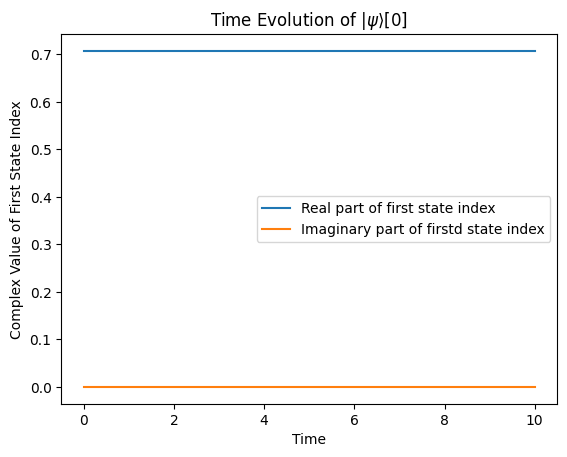

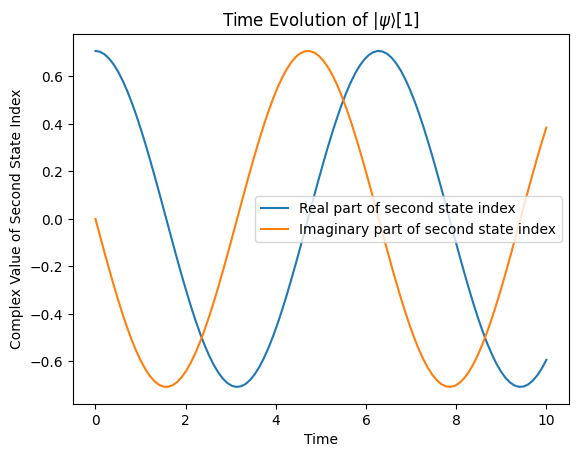

In [ ]:
# Qubit eigenvectors
vec_0 = np.array([1, 0])
vec_1 = np.array([0, 1])

# Initial condition
psi_0 = np.sqrt(1/2)*vec_0 + np.sqrt(1/2)*vec_1

# Qubit energy eigenvalues
E_0 = 0
E_1 = 1

# H = E_0 |0><0| + E_1 |1><1|
free_hamiltonian = E_0 * np.outer(vec_0, vec_0) + E_1 * np.outer(vec_1, vec_1)

time_evolution_operator = lambda H, t: expm(-1j * H * t)

time_series = np.linspace(0, 10, 100)
state_vector_series = np.array([time_evolution_operator(free_hamiltonian, t) @ psi_0 for t in time_series])

plt.plot(time_series, np.real(state_vector_series[:, 0]), label='Real part of first state index')
plt.plot(time_series, np.imag(state_vector_series[:, 0]), label='Imaginary part of firstd state index')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Complex Value of First State Index')
plt.title(r'Time Evolution of $|\psi\rangle[0]$')
plt.show()

plt.plot(time_series, np.real(state_vector_series[:, 1]), label='Real part of second state index')
plt.plot(time_series, np.imag(state_vector_series[:, 1]), label='Imaginary part of second state index')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Complex Value of Second State Index')
plt.title(r'Time Evolution of $|\psi\rangle[1]$')
plt.show()


# Reproducing Box 3 from "A short introduction to the Lindblad Master Equation"


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


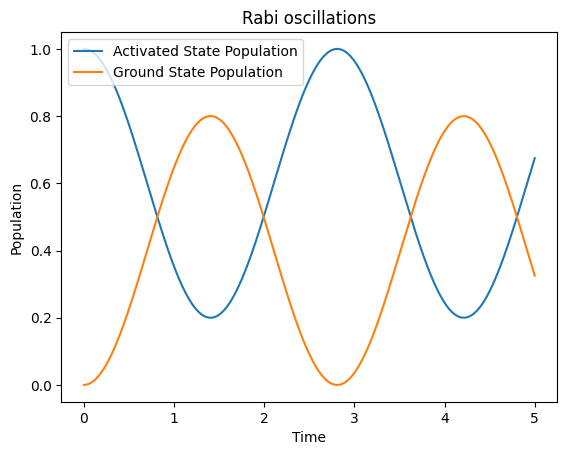

In [ ]:
# Proportional to driving
omega = 1

# Hamiltonian from Box 3 in the paper
driving_hamiltonian = free_hamiltonian + omega * (np.outer(vec_0, vec_1) + np.outer(vec_1, vec_0))

# Initial density matrix
# This has the probability of the activated state at 0,
# and probability of the ground state at 1
rho_0 = np.array(np.outer(vec_1, vec_1), dtype=complex)

def vN_equation(t, rho_flat, H):
  rho = rho_flat.reshape((2, 2))
  commutator = H @ rho - rho @ H
  d_rho_dt = (-1j)* commutator
  return d_rho_dt.flatten()

def solve_vN_equation(rho_0, H, t_a, t_b, numtimes=1000):

  time_series = np.linspace(t_a, t_b, numtimes)
  solution = solve_ivp(fun=vN_equation, t_span=(t_a, t_b), y0=rho_0.flatten(), t_eval=time_series, args=(H, ), method='RK45')
  rho_flat_series = solution.y

  return rho_flat_series, time_series

rho_flat_series, time_series = solve_vN_equation(rho_0, H=driving_hamiltonian, t_a=0, t_b=5)

ground_population_series = rho_flat_series[0]
activated_population_series = rho_flat_series[3]

plt.plot(time_series, activated_population_series, label='Activated State Population')
plt.plot(time_series, ground_population_series, label='Ground State Population')
plt.legend()
plt.title('Rabi oscillations')
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

The same Rabi oscillations may be produced by solving the von Neumann equation with the time-evolution operator.

Text(0.5, 1.0, 'Rabi oscillations')

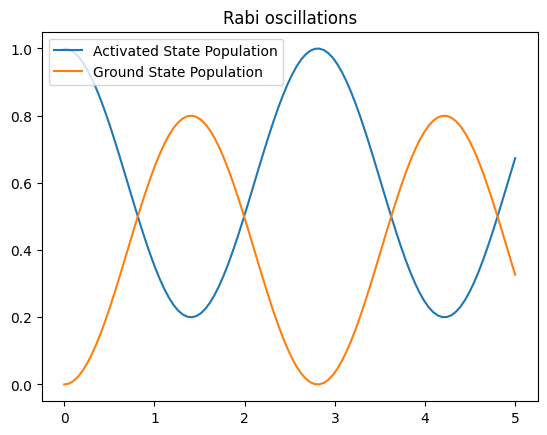

In [ ]:
time_series = np.linspace(0, 5, 100)
time_evolution_operator_series = np.array([time_evolution_operator(driving_hamiltonian, t) for t in time_series])

density_matrix_series = np.array([U @ rho_0 @ U.conj().T for U in time_evolution_operator_series])

ground_population_series = np.array([np.real(density_matrix[0, 0]) for density_matrix in density_matrix_series])
activated_population_series = np.array([np.real(density_matrix[1, 1]) for density_matrix in density_matrix_series])
plt.plot(time_series, activated_population_series, label='Activated State Population')
plt.plot(time_series, ground_population_series, label='Ground State Population')
plt.legend()
plt.title('Rabi oscillations')

/usr/local/lib/python3.12/dist-packages/scipy/linalg/_matfuncs.py:218: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  F = scipy.linalg._matfuncs_inv_ssq._logm(A)
/usr/local/lib/python3.12/dist-packages/scipy/linalg/_matfuncs.py:218: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  F = scipy.linalg._matfuncs_inv_ssq._logm(A)


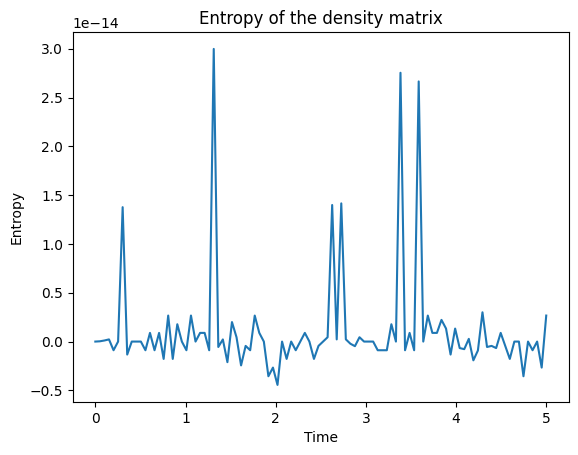

In [ ]:
# Out of an interest in thermodynamics, we might as well show
# The vN entropy is constant in time as well

vN_entropy = lambda rho: -np.trace(rho @ logm(rho))

vN_entropy_series = np.array([vN_entropy(rho) for rho in density_matrix_series])
plt.plot(time_series, vN_entropy_series)
plt.title('Entropy of the density matrix')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.show()

Close enough to constant entropy of zero. But I would expect the entropy to be a little higher than zero. Perhaps it is slightly positive but not larger than the numerical error.

Philip Strassberg writes $$\text{det}\{\rho(t) - \lambda I\} = \text{det}\{U(t)[\rho(0)-\lambda I]U(t)^\dagger\} = \text{det}\{\rho(0)-\lambda I\},$$

meaning that the characteristic polynomial of the density matrix does not change over time during unitary evolution in an isolated system.

# Tensor product postulate

"The state-space of a composite physical system, composed by $N$ subsystems, is the tensor product of the state space of each component $\mathcal{H} = \mathcal{H}_1 \otimes \mathcal{H}_2\cdots \otimes \mathcal{H}_N$. The state of a composite physical system is giiven by a unit vector of $\mathcal{H}$. Moreover, if each subsystem belonging to $\mathcal{H}$_i is prepared in the state $|\psi_i\rangle$, the total state is given by $|\psi\rangle = |\psi_1\rangle\otimes |\psi_2\rangle \otimes \cdots \otimes |\psi_N\rangle$." - A short introduction to the Lindblad Master Equation by Daniel Manzano

"Mathematically, the system-bath composite is a *bipartite* quantum system described by the tensor product of the system and bath Hilbert space: $\mathcal{H}_S\otimes \mathcal{H}_b$. The dimension of that space is $\text{dim}(\mathcal{H}_S\otimes \mathcal{H}_B) = \text{dim}\mathcal{H}_S\cdot\text{dim}\mathcal{H}_B$." - Philipp Strassberg in Quantum Stochastic Thermodynamics


# Problem 1.7 in Griffiths (First edition)

**a)** Normalize $\Psi$
$$\int_{-\infty}^{+\infty}|\Psi(x, t)|^2 dx = \int_0^a (A\frac{x}{a})^2dx + \int_{a}^{b}\left(A\frac{b-x}{b-a}\right)^2dx$$

$$= A^2 \left[\int_0^a \left(\frac{x}{a}\right)^2dx + \int_a^b \left(\frac{b-x}{b-a}\right)^2dx\right]=1$$
$$= A^2 \left[\frac{a}{3} - \int_{b-a}^0 \left(\frac{u}{b-a}\right)^2du\right]=1$$

$$= A^2 \left[\frac{a}{3} + \int_{0}^{b-a} \left(\frac{u}{b-a}\right)^2du\right]=1$$

$$= A^2 \left[\frac{a}{3} +\left. \frac{u^3}{3(b-a)^2}\right|_{0}^{b-a}\right]=1$$
$$= A^2 \left[\frac{a}{3} + \frac{b-a}{3}\right]=1$$
$$A = \sqrt{\frac{3}{b}}$$

Probability density integral:  0.9999495001025456


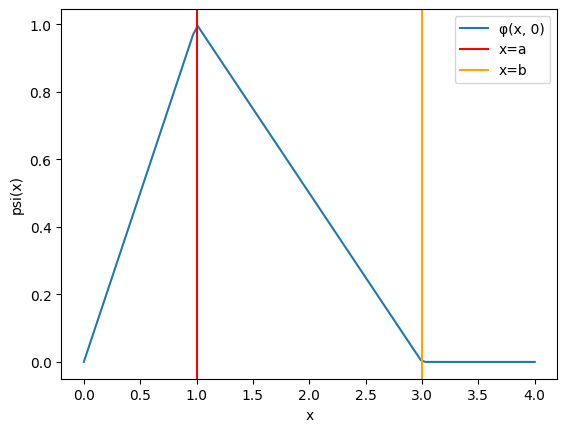

In [ ]:
def wave_function(x, a, b):
  if x <= a and x >= 0:
    return np.sqrt(3/b)*x/a
  elif x >= a and x <= b:
    return np.sqrt(3/b)*(b-x)/(b-a)
  else:
    return 0

a = 1
b = 3

x_series = np.linspace(0, b+a, 100)
psi_series = np.array([wave_function(x, a, b) for x in x_series])
print('Probability density integral: ', trapezoid(psi_series**2, x_series))

plt.plot(x_series, psi_series, label='φ(x, 0)')
plt.axvline(a, label='x=a', color='red')
plt.axvline(b, label='x=b', color='orange')
plt.xlabel('x')
plt.ylabel('psi(x)')
plt.legend()
plt.show()


The particle is most likely to be found at $x=a$.

The probability of finding the particle to the particle to the left of $a$ is

$$p(x\leq a) = \int_0^a \left(\sqrt{\frac{3}{b}}\frac{x}{a}\right)^2dx = \frac{3}{b}\cdot\frac{a}{3} = \frac{a}{b}$$

In [ ]:
print(f'Considering a={a} and b={b},')
print('Probability of finding particle to the left of a:', trapezoid(np.array([wave_function(x, a, b)**2 for x in np.linspace(0, a, 100)]), np.linspace(0, a, 100)))
print('Expectation value of x:', trapezoid(np.array([x*wave_function(x, a, b)**2 for x in np.linspace(0, b, 100)]), np.linspace(0, b, 100)))

Considering a=1 and b=3,
Probability of finding particle to the left of a: 0.33335033840084355
Expectation value of x: 1.2502295684113864


# Exercise 2.26 in Schumacher and Westmoreland

$$|\psi(t)\rangle = \frac{1}{\sqrt{2}}e^{-i\omega_0 t}|E_0\rangle + \frac{1}{\sqrt{2}}e^{-i\omega_0 t}|E_1\rangle$$

$$|u\rangle = \frac{1}{\sqrt{2}}|E_0\rangle + \frac{1}{\sqrt{2}}|E_1\rangle$$

$$\langle u | \psi(t) \rangle = \frac{1}{\sqrt{2}}(\langle E_0|\psi(t)\rangle + \langle E_1 | \psi(t)\rangle)$$

$$\langle E_0|\psi(t)\rangle = \frac{1}{\sqrt{2}}e^{-i\omega_0 t}$$

$$\langle E_1|\psi(t)\rangle = \frac{1}{\sqrt{2}}e^{-i\omega_1 t}$$

$$\langle u | \psi(t) \rangle = \frac{1}{2}(e^{-i\omega_0 t} + e^{-i\omega_1 t})$$

$$P_u(t) = |\langle u | \psi(t)\rangle|^2 = \frac{1}{4}|e^{-i\omega_0 t} + e^{-i\omega_1 t}|^2$$

$$|e^{-i\omega_0 t} + e^{-i\omega_1 t}|^2=(e^{-i\omega_0 t} + e^{-i\omega_1 t})(e^{i\omega_0 t} + e^{i\omega_1 t})=2+e^{i(\omega_0-\omega_1)t}+e^{i(\omega_1-\omega_0)t}$$
$$=2+\cos((\omega_0-\omega_1)t) + i\sin((\omega_0-\omega_1)t) + \cos((\omega_1-\omega_0)t) + i\text{sin}((\omega_1-\omega_0)t) = 2+2\cos((\omega_0-\omega_1)t)$$

$$\therefore\quad P_u(t) = \frac{1}{2}(1+\cos((\omega_0-\omega_1)t))$$

## 1.2

**Q**: Prove

$$[AB, CD] = -AC\{D, B\} + A\{C, B\} D - C\{D, A\} B + \{C, A\}DB$$

**A**:

$$[AB, CD] = ABCD - CDAB$$

$$\{D, B\} = DB + BD$$

$$\{C, B\} = CB + BC$$

$$\{D, A\} = DA + AD$$

$$\{C, A\} = CA + AC$$

$$-AC\{D, B\} = -ACDB - ACBD$$
$$A\{C, B\}D = ACBD + ABCD$$
$$-C\{D, A\} B = -CDAB -CADB$$
$$\{C, A\}DB = CADB + ACDB$$

$$-AC\{D, B\} + A\{C, B\}D = -ACDB + ABCD$$

$$-AC\{D, B\} + A\{C, B\}D + \{C, A\}DB = CADB + ABCD$$

$$-AC\{D, B\} + A\{C, B\}D + \{C, A\}DB-C\{D, A\} B = ABCD - CDAB$$

$$\therefore\quad [AB, CD] = -AC\{D, B\} + A\{C, B\} D - C\{D, A\} B + \{C, A\}DB$$
QED

## 1.3

**Q**: For the spin $\frac{1}{2}$ state $|S_x; + \rangle$, evaluate both sides of the inequality

$$\left\langle (\Delta A)^2\right\rangle\left\langle (\Delta B)^2\right\rangle \geq \frac{1}{4}|\langle[A, B]\rangle|^2$$
for the operators $A=S_x$ and $B=S_y$, and show that the inequality is satisfied. Repeat for the operators $A=S_z$ and $B=S_y$.

**A**:

$$\Delta S_x = S_x - \langle S_x \rangle$$

The state of the system is $|S_x; +\rangle$, so the only possible measurement via $S_x|S_x; +\rangle$ is simply the corresponding eigenvalue $+\frac{\hbar}{2}$.
$$\left\langle (\Delta S_x)^2\right\rangle = \langle S_x^2\rangle - \langle S_x\rangle^2 = \frac{\hbar^2}{4} - \frac{\hbar^2}{4} = 0$$

By contrast, the possible measurement values of $S_y|S_x;+\rangle$ are $\pm\frac{\hbar}{2}$ with equal probabilities:

$$\left\langle (\Delta S_y)^2\right\rangle = \langle S_y^2\rangle - \langle S_y\rangle^2 = \frac{\hbar^2}{4}$$

By the commutation relations (Eq. 1.113),
$$\langle[S_x, S_y]\rangle =\langle i\epsilon_{xyz}\hbar S_z \rangle=  \langle i\hbar S_z\rangle = i\hbar0=0,$$

where $\epsilon_{xyz}$ is the Levi-Civita permutation symbol such that the cyclic $\epsilon_{xyz}=+1$, the anticyclic $\epsilon_{yxz}=-1$, and the repeated $\epsilon_{xxz}= 0$.

$$\left\langle \Delta S_x^2\right\rangle\left\langle \Delta S_y^2\right\rangle = 0 \geq \frac{1}{4}|\langle[S_x, S_y]\rangle|^2=0$$

Repeating the calculation for $S_z|S_x;+\rangle$ and $S_y|S_x;+\rangle$,

$$\left\langle (\Delta S_z)^2\right\rangle = \langle S_x^2\rangle - \langle S_x\rangle^2 = \frac{\hbar^2}{4}$$

$$\langle[S_z, S_y]\rangle =\langle -i\epsilon_{zyx}\hbar S_x\rangle =  \langle i\hbar S_x\rangle = -i\hbar\frac{\hbar}{2}=-i\frac{\hbar^2}{2},$$

$$\left\langle \Delta S_z^2\right\rangle\left\langle \Delta S_y^2\right\rangle = \frac{\hbar^4}{16} \geq \frac{1}{4}|\langle[S_z, S_y]\rangle|^2=\frac{\hbar^4}{16}$$


# 1.4

The Pauli matrices (Eq 3.50) are

$$\sigma_1 = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \quad \sigma_2 = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \quad \sigma_3 = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

**Q**: Suppose a $2\times 2$ matrix $X$ (no necessarily Hermitian, nor unitary) is written as

$$X = a_0 + \mathbf{\sigma}\cdot\mathbf{a},$$
where the matrices $\mathbf{\sigma}$ are given in (3.50) and $a_0$ and $a_{1, 2, 3}$ are numbers.

a. How are $a_0$ and $a_k$ related to $\text{tr}(X)$ and $\text{tr}(\sigma_k X)$?

b. Obtain $a_0$ and $a_k$ in terms of matrix elements $X_{ij}$.

**A**:

Expanding terms,

$$X = a_0 I + a_1\sigma_1 +a_2\sigma_2 + a_3\sigma_3$$

Since the trace of each Pauli matrix is zero,

$$\text{tr}(X) = 2a_0$$

Let's find the products $\sigma_k X$ and traces $\text{tr}(\sigma_k X)$ individually:

i.

 $$\sigma_1 X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\left(a_0I + a_1\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}+a_2\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} +a_3\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\right)$$

$$\sigma_1 X = \left(a_0\sigma_1 + a_1\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}+a_2\begin{bmatrix} i & 0 \\ 0 & -i \end{bmatrix} +a_3\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}\right)$$

$$\text{tr}(\sigma_1 X) = 0 + 2a_1 + 0 + 0 = 2a_1$$

ii.

 $$\sigma_2 X = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\left(a_0I + a_1\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}+a_2\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} +a_3\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\right)$$

 $$\sigma_2 X = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\left(a_0\sigma_2 + a_1\begin{bmatrix} -i & 0 \\ 0 & i\end{bmatrix}+a_2\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} +a_3\begin{bmatrix} 0 & i \\ i & 0 \end{bmatrix}\right)$$

 $$\text{tr}(\sigma_2 X) = 0 + 0 + 2a_2 + 0 = 2a_2$$

 iii.

 $$\sigma_3 X = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\left(a_0I + a_1\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}+a_2\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} +a_3\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\right)$$

 $$\sigma_3 X = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\left(a_0\sigma_3 + a_1\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}+a_2\begin{bmatrix} 0 & -i \\-i & 0 \end{bmatrix} +a_3\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\right)$$

 $$\text{tr}(\sigma_2 X) = 0 + 0 + 0 + 2a_3 = 2a_3$$

 a) Considering $\sigma_0 = I$, the trace $\text{tr}(\sigma_kX) = 2a_k$ for $k=[0, 1, 2, 3]$.

 b)

 $$X = \left(a_0I + a_1\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}+a_2\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} +a_3\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\right)$$
 $$X = \begin{bmatrix}a_0 + a_3 & a_1 - a_2i\\ a_1 + a_2i& a_0 - a_3\end{bmatrix}$$

$$\text{det}(AB) = \text{det}(A)\text{det}(B)$$

Therefore

$$\text{det}\left(\mathbf{\sigma}\cdot a'\right) = \text{det}\left(\mathbf{\sigma}\cdot a\right)\text{det}\left(\exp\left(\frac{i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)\right)\text{det}\left(\exp\left(\frac{-i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)\right)$$

So it is incumbent to show

$$\text{det}\left(\exp\left(\frac{i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)\right)\text{det}\left(\exp\left(\frac{-i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)\right)=1$$

Suppose the matrix $\frac{i\sigma\cdot\hat{\mathbf{n}}\phi}{2}$ has eigenvalues $\lambda_1, \ldots, \lambda_m$, and the matrix $\frac{-i\sigma\cdot\hat{\mathbf{n}}\phi}{2}$ has eigenvalues $-\lambda_1, \ldots, -\lambda_m$.

Then, the matrix $\exp\left(\frac{i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)$ has eigenvalues $e^{\lambda_1}, \ldots, e^{\lambda_m}$ and $\exp\left(\frac{-i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)$ has eigenvalues $e^{-\lambda_1}, \ldots, e^{-\lambda_m}$.

As the determinant of a matrix is the product of its eigenvalues,
$$\text{det}\left(\exp\left(\frac{i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)\right)\text{det}\left(\exp\left(\frac{-i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)\right)=\prod_{i=1}^m e^{\lambda_i}e^{-\lambda_i}=1 $$

QED the determinant is invariant between $\mathbf{\sigma}\cdot\mathbf{a}$ and $\mathbf{\sigma}\cdot\mathbf{a}'$.

Suppose $\hat{\mathbf{n}}$ being in the positive z-direction means $\hat{\mathbf{n}} = \begin{bmatrix}0 \\ 0 \\ 1\end{bmatrix}$. Then,

$$\mathbf{\sigma}\cdot \hat{\mathbf{n}} = \sigma_3 = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

$$\exp\left(\frac{i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)=\begin{bmatrix}e^{i\phi/2} & 0 \\ 0 & e^{-i\phi/2}\end{bmatrix}$$

$$\exp\left(\frac{-i\sigma\cdot\hat{\mathbf{n}}\phi}{2}\right)=\begin{bmatrix}e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2}\end{bmatrix}$$

$$\mathbf{\sigma}\cdot\mathbf{a}' = \begin{bmatrix}e^{i\phi/2} & 0 \\ 0 & e^{-i\phi/2}\end{bmatrix}\mathbf{\sigma}\cdot\mathbf{a}\begin{bmatrix}e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2}\end{bmatrix}$$

$$a_1'\sigma_1 + a_2'\sigma_2 + a_3'\sigma_3 = \begin{bmatrix}e^{i\phi/2} & 0 \\ 0 & e^{-i\phi/2}\end{bmatrix}\left(a_1 \sigma_1 + a_2\sigma_2 + a_3\sigma_3\right)\begin{bmatrix}e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2}\end{bmatrix}$$

$$\begin{bmatrix} 0 & a_1' \\ a_1' & 0 \end{bmatrix} + \begin{bmatrix}0 & -a_2'i \\ a_2'i & 0\end{bmatrix}+\begin{bmatrix}a_3' & 0 \\ 0 & -a_3'\end{bmatrix} = \begin{bmatrix}a_3' & a_1'-a_2'i \\ a_1' + a_2'i & -a_3'\end{bmatrix}$$

$$\begin{bmatrix}a_3' & a_1'-a_2'i \\ a_1' + a_2'i & -a_3'\end{bmatrix} = \begin{bmatrix}e^{i\phi/2} & 0 \\ 0 & e^{-i\phi/2}\end{bmatrix}\begin{bmatrix}a_3 & a_1-a_2i \\ a_1 + a_2i & -a_3\end{bmatrix}\begin{bmatrix}e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2}\end{bmatrix}$$

$$=\begin{bmatrix}e^{i\phi/2} & 0 \\ 0 & e^{-i\phi/2}\end{bmatrix}\begin{bmatrix}a_3e^{-i\phi/2} & e^{i\phi/2}(a_1-a_2i) \\ e^{-i\phi/2}(a_1+a_2i) & -a_3e^{i\phi/2}\end{bmatrix}$$

$$=\begin{bmatrix}a_3 & e^{i\phi}(a_1-a_2i) \\ e^{-i\phi}(a_1+a_2i) & -a_3\end{bmatrix}$$

$a_3' = a_3$

$a_1' - a_2'i = e^{i\phi}(a_1 - a_2i)$

$a_1' + a_2'i = e^{-i\phi}(a_1 + a_2i)$

$a_1' = \frac{1}{2}\left(a_1(e^{i\phi} + e^{-i\phi})+a_2i(e^{-i\phi}-e^{i\phi})\right)$

$a_2' = \frac{1}{i}e^{-i\phi}(a_1 + a_2i) - \frac{1}{2i}\left(a_1(e^{i\phi} + e^{-i\phi})+a_2i(e^{-i\phi}-e^{i\phi})\right)$

This is a rotation, with the z-direction invariant.

# 1.6

Using the rules of bra-ket algebra, prove or evaluate the following:

a. $\text{tr}(XY) = \text{tr}(YX)$

By equation 1.73, the trace formula should be

$\text{tr}(X) = \sum_{a'} \langle a'|X|a'\rangle$

so the proposition is

$$\text{tr}(XY) = \sum_{a'}\langle a'|XY|a'\rangle = \sum_{a'} \langle a'|YX|a'\rangle = \text{tr}(YX)$$

The identity can be inserted in the middle,

$$\text{tr}(XY) = \sum_{a'}\sum_{a''} \langle a'|X|a''\rangle\langle a''|Y|a'\rangle=\sum_{a'}\sum_{a''} \langle a''|Y|a'\rangle\langle a'|X|a''\rangle$$

and the identity can furthermore be canceled from the expression:

$$\text{tr}(XY) = \sum_{a'}\sum_{a''} \langle a''|Y|a'\rangle\langle a'|X|a''\rangle = \sum_{a''} \langle a''|YX|a''\rangle = \text{tr}(YX)$$

QED $\text{tr}(XY) = \text{tr}(YX)$.

b. $(XY)^\dagger = Y^\dagger X^\dagger$

According to equation 1.73, the matrix representation of an operator is

$$X \stackrel{\cdot}{=} \begin{bmatrix} \langle a^{(1)}|X|a^{(1)}\rangle & \langle a^{(1)}|X|a^{(2)}\rangle & \cdots \\ \langle a^{(2)}|X|a^{(1)}\rangle & \langle a^{(2)}|X|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}$$

which implies

$$X^{\dagger} \stackrel{\cdot}{=} \begin{bmatrix} \langle a^{(1)}|X|a^{(1)}\rangle^* & \langle a^{(2)}|X|a^{(1)}\rangle^* & \cdots \\ \langle a^{(1)}|X|a^{(2)}\rangle^* & \langle a^{(2)}|X|a^{(2)}\rangle^* & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}=\begin{bmatrix} \langle a^{(1)}|X^{\dagger}|a^{(1)}\rangle & \langle a^{(1)}|X^{\dagger}|a^{(2)}\rangle & \cdots \\ \langle a^{(2)}|X^{\dagger}|a^{(1)}\rangle & \langle a^{(2)}|X^{\dagger}|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}$$


$$Y \stackrel{\cdot}{=} \begin{bmatrix} \langle a^{(1)}|Y|a^{(1)}\rangle & \langle a^{(1)}|Y|a^{(2)}\rangle & \cdots \\ \langle a^{(2)}|Y|a^{(1)}\rangle & \langle a^{(2)}|Y|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}$$

$$Y^{\dagger} \stackrel{\cdot}{=} \begin{bmatrix} \langle a^{(1)}|Y|a^{(1)}\rangle^* & \langle a^{(2)}|Y|a^{(1)}\rangle^* & \cdots \\ \langle a^{(1)}|Y|a^{(2)}\rangle^* & \langle a^{(2)}|Y|a^{(2)}\rangle^* & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}=\begin{bmatrix} \langle a^{(1)}|Y^{\dagger}|a^{(1)}\rangle & \langle a^{(1)}|Y^{\dagger}|a^{(2)}\rangle & \cdots \\ \langle a^{(2)}|Y^{\dagger}|a^{(1)}\rangle & \langle a^{(2)}|Y^{\dagger}|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}$$


$$XY \stackrel{\cdot}{=} \begin{bmatrix} \langle a^{(1)}|X|a^{(1)}\rangle & \langle a^{(1)}|X|a^{(2)}\rangle & \cdots \\ \langle a^{(2)}|X|a^{(1)}\rangle & \langle a^{(2)}|X|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}\begin{bmatrix} \langle a^{(1)}|Y|a^{(1)}\rangle & \langle a^{(1)}|Y|a^{(2)}\rangle & \cdots \\ \langle a^{(2)}|Y|a^{(1)}\rangle & \langle a^{(2)}|Y|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}=\begin{bmatrix}\sum_{a'} \langle a^{(1)}|X|a'\rangle\langle a'|Y|a^{(1)}\rangle &\sum_{a'}\langle a^{(1)}|X|a'\rangle\langle a'|Y|a^{(2)}\rangle & \cdots \\ \sum_{a'} \langle a^{(2)}|X|a'\rangle\langle a'|Y|a^{(1)}\rangle &\sum_{a'}\langle a^{(2)}|X|a'\rangle\langle a'|Y|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots \end{bmatrix}$$

Taking the conjugate transpose of this matrix product,

$$(XY)^{\dagger} \stackrel{\cdot}{=} \begin{bmatrix}\sum_{a'} \langle a'|X^{\dagger}|a^{(1)}\rangle\langle a^{(1)}|Y^{\dagger}| a'\rangle &\sum_{a'}\langle a'|X^{\dagger}|a^{(2)}\rangle\langle a^{(1)}|Y^{\dagger}|a'\rangle & \cdots \\ \sum_{a'} \langle a'|X^{\dagger}|a^{(1)}\rangle\langle a^{(2)}|Y^{\dagger}|a'\rangle &\sum_{a'}\langle a'|X^{\dagger}|a^{(2)}\rangle\langle a^{(2)}|Y^{\dagger}|a'\rangle & \cdots \\ \vdots & \vdots & \ddots \end{bmatrix}$$

Meanwhile, the matrix product

$$Y^{\dagger}X^{\dagger} \stackrel{\cdot}{=} \begin{bmatrix} \langle a^{(1)}|Y^{\dagger}|a^{(1)}\rangle & \langle a^{(1)}|Y^{\dagger}|a^{(2)}\rangle & \cdots \\ \langle a^{(2)}|Y^{\dagger}|a^{(1)}\rangle & \langle a^{(2)}|Y^{\dagger}|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}\begin{bmatrix} \langle a^{(1)}|X^{\dagger}|a^{(1)}\rangle & \langle a^{(1)}|X^{\dagger}|a^{(2)}\rangle & \cdots \\ \langle a^{(2)}|X^{\dagger}|a^{(1)}\rangle & \langle a^{(2)}|X^{\dagger}|a^{(2)}\rangle & \cdots \\ \vdots & \vdots & \ddots\end{bmatrix}=\begin{bmatrix}\sum_{a'} \langle a'|X^{\dagger}|a^{(1)}\rangle\langle a^{(1)}|Y^{\dagger}| a'\rangle &\sum_{a'}\langle a'|X^{\dagger}|a^{(2)}\rangle\langle a^{(1)}|Y^{\dagger}|a'\rangle & \cdots \\ \sum_{a'} \langle a'|X^{\dagger}|a^{(1)}\rangle\langle a^{(2)}|Y^{\dagger}|a'\rangle &\sum_{a'}\langle a'|X^{\dagger}|a^{(2)}\rangle\langle a^{(2)}|Y^{\dagger}|a'\rangle & \cdots \\ \vdots & \vdots & \ddots \end{bmatrix}$$

is identical. QED $(XY)^{\dagger} = Y^{\dagger}X^{\dagger}$

c. $$\exp[if(A)] = ?$$


In equation (1.219), it is written

$$\exp(X) \equiv 1 + X + \frac{X^2}{2} + \cdots$$

so, written as an infinite sum,

$$\exp([if(A)] = \sum_{n=0}^{\infty} \frac{(if(A))^n}{n!}$$

Then, we can plug in $A$ in the eigenbasis $A = \sum_{a'} a'|a'\rangle \langle a'|$.

$$\exp([if(A)] = \sum_{n=0}^{\infty} \frac{(if(\sum_{a'} a'|a'\rangle \langle a'))^n}{n!}$$

There is also a general rule

$$g(A) = \sum_{a'}g(a')|a'\rangle \langle a'|$$

which implies

$$\exp([if(A)] = \sum_{a'}\exp(if(a'))|a'\rangle \langle a'|$$

d. The inner product

$$\sum_{a'}\langle \mathbf{x}'|a'\rangle \langle a'|\mathbf{x}''\rangle = \langle \mathbf{x}''|\mathbf{x}'\rangle = \delta(\mathbf{x}'' - \mathbf{x}')$$
is one when the two positions are the same and zero when they are different.
